# MWE: Monte Carlo envelope tests

In [1]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import scipy.io 
import matplotlib.pyplot as plt
import cmocean
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.utilities.spatstats_utils import compute_envelope_test
from src.utilities.utilstf import get_spectrogram, find_zeros_of_spectrogram

In [2]:
np.random.seed(0) 

# signal parameters
SNRin = 10
N = 2**8
# Nsub=N//2
sbank = SignalBank(N=N, Nsub=128)
s = sbank.signal_linear_chirp()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_impulses()
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

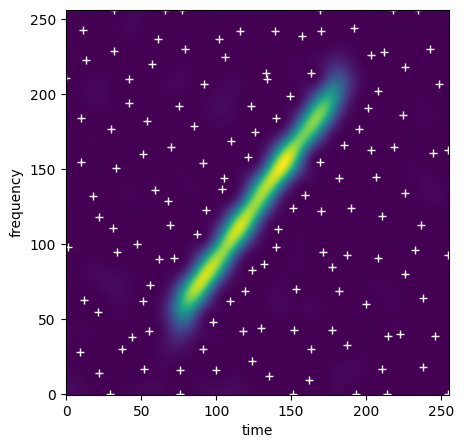

In [3]:
Nfft = 2*N
S, stft = get_spectrogram(signal)
ceros = find_zeros_of_spectrogram(S)
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow(S, origin='lower')
ax.plot(ceros[:,1],ceros[:,0],'w+')
ax.set_xlabel('time'); ax.set_ylabel('frequency')
plt.show()

10


[Text(0.5, 0, 'r_max'), Text(0, 0.5, 'T(r_max)')]

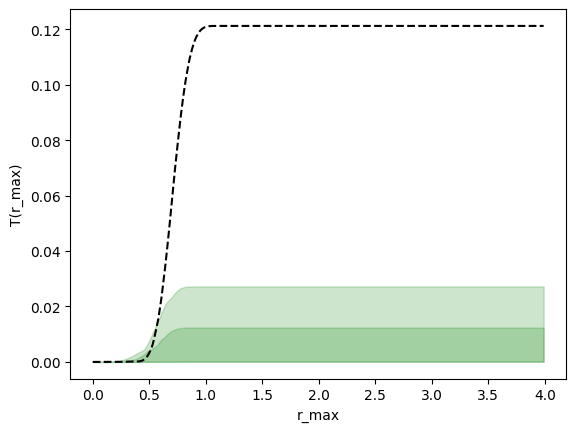

In [4]:
np.random.seed(0)
noise = np.random.randn(N)
output_dict = compute_envelope_test(signal, statistic='Frs', alpha=0.05, pnorm=2, return_values=True)
print(output_dict['k'])
fig, ax = plt.subplots(1,1)
ax.fill_between(output_dict['radius'], output_dict['tm'][output_dict['k']], output_dict['tm'][-1], color='g', alpha=.2)
ax.fill_between(output_dict['radius'], output_dict['tm'][0], output_dict['tm'][-1], color='g', alpha=.2)
ax.plot(output_dict['radius'],output_dict['t_exp'],'k--')
ax.set(xlabel='r_max',ylabel='T(r_max)')

(0.0, 1.2)

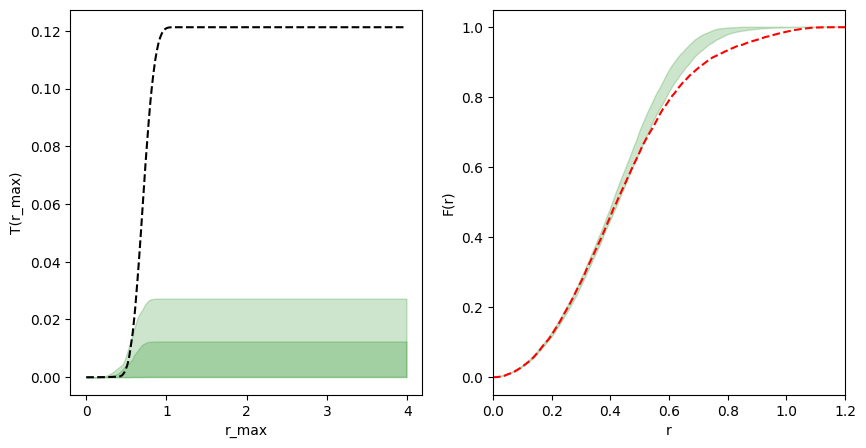

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].fill_between(output_dict['radius'], output_dict['tm'][output_dict['k']], output_dict['tm'][-1], color='g', alpha=.2)
ax[0].fill_between(output_dict['radius'], output_dict['tm'][0], output_dict['tm'][-1], color='g', alpha=.2)
ax[0].plot(output_dict['radius'],output_dict['t_exp'],'k--')
ax[0].set(xlabel='r_max',ylabel='T(r_max)')

Sm = tm = np.sort(output_dict['Sm'], axis=0)[::-1, :]
ax[1].fill_between(output_dict['radius'], Sm[0], Sm[-1], color='g', alpha=.2)
# ax[1].fill_between(output_dict['radius'], output_dict['Sm'][0], output_dict['Sm'][-1], color='g', alpha=.2)
ax[1].plot(output_dict['radius'],output_dict['Sexp'].T,'r--')
ax[1].set(xlabel='r',ylabel='F(r)')
ax[1].set_xlim((0,1.2))